In [2]:
import numpy as np

def Jacobi(A, b, iter_n, initial_guess=0):
    n = len(A)
    D = np.diag(A)
    R = A - np.diag(D)
    x_i = initial_guess * np.ones(n)
    for i in range(iter_n):
        x_i = (b - R.dot(x_i)) / D
    return x_i

# 例1

In [3]:
import numpy as np
def A_ij(n):
    A = np.zeros((n, n))
    h=1.0/(1+n)

    for i in range(n):
        A[i, i] = -4*h**2-2
        if i < n-1:
            A[i, i+1] = 1
            A[i+1, i] = 1

    return A

def b_i(n):
    b=np.zeros(n)   
    b[0]=-1
    b[n-1]=-3
    return b

In [7]:
n=5
y0=np.zeros(n)
y=Jacobi(A_ij(n),b_i(n),100,y0)
print(y)

[0.98696635 1.08359564 1.30062444 1.66216707 2.20839493]


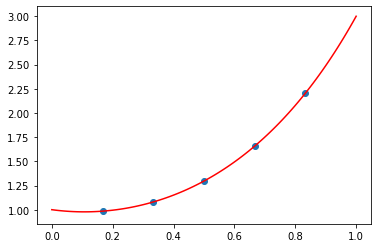

In [8]:
import matplotlib.pyplot as plt
x_range=np.linspace(0,1,100)
xx=np.linspace(0,1,n+2)
def f(x):
    return 0.394923*np.exp(-2*x)*(1.53214+np.exp(4*x))
plt.plot(x_range,f(x_range),'r-')
plt.scatter(xx[1:-1],y)
plt.show()

In [9]:
err=f(xx[1:-1])-y
print(err)

[-0.00225006 -0.00373361 -0.00451691 -0.00446371 -0.00319469]


In [14]:
yyy=y.copy()
print(yyy)

[0.97700499 0.98639733 1.02891394 1.10568472 1.21987541 1.37470753
 1.57592944 1.82953764 2.14434788 2.53021768]


# 例2

In [10]:
def Newton_Method(F, DF, x, iter_num=10**4):
    for i in range(iter_num):
        s = np.linalg.inv(DF(x)).dot(F(x))
        #print('At',i,'x=',x, 'norm=',np.linalg.norm(s, ord=np.inf, keepdims=False))
        x -= s
    return x

In [12]:
import numpy as np
def F(w):
    wt=w.copy()
    n=wt.size
    h=1/(1+n)
    ft=np.zeros(n)
    
    ft[0]=1-(2+h**2)*wt[0]+h**2*w[0]**2+w[1]
    ft[n-1]=w[n-2]-(2+h**2)*wt[n-1]+h**2*w[n-1]**2+4
    
    for i in range(1,n-1):
        ft[i]=w[i-1]-(2+h**2)*wt[i]+h**2*w[i]**2+w[i+1]
    
    return np.array(ft) 

def DF(w):
    n=w.size
    A = np.zeros((n, n))
    h=1.0/(1+n)

    for i in range(n):
        A[i, i] = 2*h**2*w[i]-(2+h**2)
        if i < n-1:
            A[i, i+1] = 1
            A[i+1, i] = 1

    return A   

In [13]:
n=10
y0=np.zeros(n)

y=Newton_Method(F,DF,y0,1000)
print(y)

[1.5207235  2.03490257 2.53167729 2.9964048  3.41169398 3.75898349
 4.02056246 4.18177483 4.23302467 4.17117142]


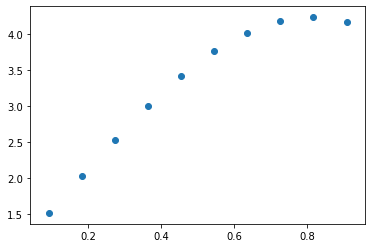

In [14]:
xx=np.linspace(0,1,n+2)
plt.scatter(xx[1:-1],y)

# 例3

In [14]:
def Gaussian_elimination(equation):
    A = equation.copy()
    m, n = A.shape

    for i in range(m):  #化为上三角矩阵
        A[i] = A[i] / A[i, i]
        for j in range(i+1, m):
            A[j] -= A[j, i]*A[i]
    #print('A1: ',A)

    for i in range(m-1, 0, -1): # 化为对角矩阵
        for j in range(i):
            A[j] -= A[j, i]*A[i]
    #print('A2: ',A)        
            
    return A

In [15]:
import numpy as np
def A_ij(n):
    A = np.zeros((n, n))
    t=np.linspace(0,1,n)
    
    A[0,0]=1
    for i in range(n):
        A[n-1,i]=1

    for i in range(1,n-1):
        for j in range(n):
            A[i,j]=(j)*(j-1)*t[i]**(j-2)-4*t[i]**(j)

    return A

def b_i(n):
    b=np.zeros(n)   
    b[0]=1
    b[n-1]=3
    return b

In [16]:
n=5

def y(t):
    b2=np.expand_dims(b_i(n),axis=0)
    B=np.concatenate((A_ij(n),b2.T),axis=1)
    c=Gaussian_elimination(B)[:, -1]
    print(c)

    y=0
    for i in range(n):
        y=y+c[i]*t**i
    return y
tt=np.linspace(0,1,5)
print(y(tt))

[ 1.         -0.44189017  2.1394636  -0.58033206  0.88275862]
[1.         1.01762452 1.29655172 1.90651341 3.        ]


In [17]:
print(tt)

[0.   0.25 0.5  0.75 1.  ]


[ 1.         -0.44189017  2.1394636  -0.58033206  0.88275862]


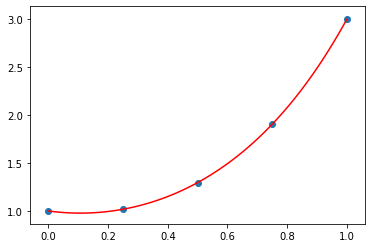

In [18]:
import matplotlib.pyplot as plt
x_range=np.linspace(0,1,100)
xx=np.linspace(0,1,n+2)
def f(x):
    return 0.394923*np.exp(-2*x)*(1.53214+np.exp(4*x))
plt.plot(x_range,f(x_range),'r-')
plt.scatter(tt,y(tt))
plt.show()

In [29]:
err=f(tt)-y(tt)
print(err)

[ 1.         -0.44189017  2.1394636  -0.58033206  0.88275862]
[ 3.25220000e-07  4.91378559e-04 -4.44201330e-04 -1.58031676e-03
 -3.48705331e-06]


# 例4

In [30]:
import numpy as np

def Jacobi(A, b, iter_n, initial_guess=0):
    n = len(A)
    D = np.diag(A)
    R = A - np.diag(D)
    x_i = initial_guess * np.ones(n)
    for i in range(iter_n):
        x_i = (b - R.dot(x_i)) / D
    return x_i

In [31]:
import numpy as np
def A_ij(n):
    A = np.zeros((n, n))
    h=1.0/(1+n)

    for i in range(n):
        A[i, i] = 8*h/3+2/h
        if i < n-1:
            A[i, i+1] = 2*h/3-1/h
            A[i+1, i] = 2*h/3-1/h

    return A

def b_i(n):
    b=np.zeros(n)   
    h=1.0/(1+n)
    
    b[0]=-1*(2*h/3-1/h)
    b[n-1]=-3*(2*h/3-1/h)
    return b

In [35]:
n=100
y0=np.zeros(n)
y=Jacobi(A_ij(n),b_i(n),100000,y0)
print(y)

[0.99603378 0.99245815 0.9892717  0.9864732  0.98406153 0.98203575
 0.98039508 0.97913886 0.9782666  0.97777797 0.97767277 0.97795095
 0.97861263 0.97965807 0.98108768 0.98290201 0.98510179 0.98768786
 0.99066125 0.99402312 0.9977748  1.00191774 1.00645358 1.0113841
 1.01671122 1.02243704 1.02856381 1.03509392 1.04202993 1.04937457
 1.05713072 1.06530141 1.07388986 1.08289942 1.09233364 1.10219621
 1.112491   1.12322204 1.13439356 1.14600991 1.15807567 1.17059556
 1.18357449 1.19701756 1.21093002 1.22531735 1.24018518 1.25553934
 1.27138585 1.28773092 1.30458098 1.32194261 1.33982264 1.35822807
 1.37716613 1.39664423 1.41667001 1.43725134 1.45839627 1.48011311
 1.50241036 1.52529678 1.54878133 1.57287323 1.59758191 1.62291709
 1.64888867 1.67550687 1.7027821  1.73072506 1.75934672 1.7886583
 1.81867129 1.84939746 1.88084886 1.91303782 1.94597697 1.97967923
 2.0141578  2.04942621 2.0854983  2.1223882  2.16011038 2.19867963
 2.23811109 2.2784202  2.31962279 2.361735   2.40477335 2.448754

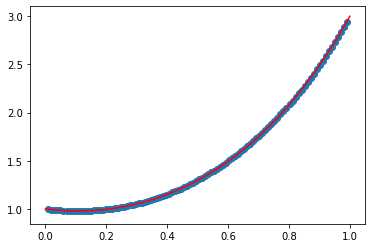

In [36]:
import matplotlib.pyplot as plt
x_range=np.linspace(0,1,100)
xx=np.linspace(0,1,n+2)
def f(x):
    return 0.394923*np.exp(-2*x)*(1.53214+np.exp(4*x))
plt.plot(x_range,f(x_range),'r-')
plt.scatter(xx[1:-1],y)
plt.show()

In [37]:
err=f(xx[1:-1])-y
print(err)

[ 8.67222588e-07  1.39680149e-06  1.91421018e-06  2.41969240e-06
  2.91348222e-06  3.39580417e-06  3.86687334e-06  4.32689549e-06
  4.77606710e-06  5.21457547e-06  5.64259883e-06  6.06030637e-06
  6.46785831e-06  6.86540599e-06  7.25309191e-06  7.63104977e-06
  7.99940452e-06  8.35827242e-06  8.70776106e-06  9.04796938e-06
  9.37898770e-06  9.70089775e-06  1.00137727e-05  1.03176770e-05
  1.06126668e-05  1.08987894e-05  1.11760837e-05  1.14445798e-05
  1.17042995e-05  1.19552555e-05  1.21974524e-05  1.24308855e-05
  1.26555418e-05  1.28713992e-05  1.30784271e-05  1.32765856e-05
  1.34658261e-05  1.36460908e-05  1.38173130e-05  1.39794167e-05
  1.41323164e-05  1.42759176e-05  1.44101162e-05  1.45347984e-05
  1.46498409e-05  1.47551105e-05  1.48504641e-05  1.49357486e-05
  1.50108007e-05  1.50754466e-05  1.51295025e-05  1.51727734e-05
  1.52050538e-05  1.52261274e-05  1.52357665e-05  1.52337323e-05
  1.52197742e-05  1.51936303e-05  1.51550265e-05  1.51036767e-05
  1.50392825e-05  1.49615

In [10]:
import numpy as np
np.zeros((1,4))

array([[0., 0., 0., 0.]])

In [11]:
np.array([[0,1]])

array([[0, 1]])